# Setting up the Task and Data

In [1]:
import numpy as np
import pandas as pd
import ray as rd
import dask.dataframe as dd
import dask.array as dp
import graphviz

In [18]:
# Define a basic Haversine distance formula
def haversine(lat1, lon1, lat2, lon2):
    MILES = 3959
    lat1, lon1, lat2, lon2 = map(np.deg2rad, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1 
    dlon = lon2 - lon1 
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a)) 
    total_miles = MILES * c
    return total_miles

In [21]:
!wget https://raw.githubusercontent.com/s-heisler/pycon2017-optimizing-pandas/master/new_york_hotels.csv

--2018-05-10 00:19:23--  https://raw.githubusercontent.com/s-heisler/pycon2017-optimizing-pandas/master/new_york_hotels.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.200.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.200.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 222663 (217K) [text/plain]
Saving to: ‘new_york_hotels.csv.1’

new_york_hotels.csv 100%[===================>] 217.44K  --.-KB/s    in 0.003s  

2018-05-10 00:19:23 (61.1 MB/s) - ‘new_york_hotels.csv.1’ saved [222663/222663]



In [22]:
!tail -n +2 new_york_hotels.csv > new_york_hotels_no_header.csv

In [23]:
!cat new_york_hotels.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv new_york_hotels_no_header.csv > big_new_york_hotels.csv

In [38]:
!tail -n +2 big_new_york_hotels.csv > big_new_york_hotels_no_header.csv

In [39]:
!cat big_new_york_hotels.csv big_new_york_hotels_no_header.csv big_new_york_hotels_no_header.csv big_new_york_hotels_no_header.csv big_new_york_hotels_no_header.csv big_new_york_hotels_no_header.csv big_new_york_hotels_no_header.csv big_new_york_hotels_no_header.csv big_new_york_hotels_no_header.csv big_new_york_hotels_no_header.csv big_new_york_hotels_no_header.csv big_new_york_hotels_no_header.csv big_new_york_hotels_no_header.csv big_new_york_hotels_no_header.csv big_new_york_hotels_no_header.csv big_new_york_hotels_no_header.csv big_new_york_hotels_no_header.csv big_new_york_hotels_no_header.csv big_new_york_hotels_no_header.csv big_new_york_hotels_no_header.csv big_new_york_hotels_no_header.csv big_new_york_hotels_no_header.csv big_new_york_hotels_no_header.csv big_new_york_hotels_no_header.csv big_new_york_hotels_no_header.csv > biggest_new_york_hotels.csv

# Small Dataset Benchmarks

## Serial Pandas

In [4]:
## Load Data
df = pd.read_csv('new_york_hotels.csv', encoding='cp1252')

In [11]:
%%timeit

# Timing apply on the Haversine function
df['distance'] = df.apply(lambda row: haversine(40.671, -73.985, row['latitude'], row['longitude']), axis=1)

10 loops, best of 3: 45.6 ms per loop


## Vectorize Pandas

In [12]:
%%timeit 

# Vectorized implementation of Haversine applied on Pandas series
df['distance'] = haversine(40.671, -73.985, df['latitude'], df['longitude'])

1000 loops, best of 3: 1 ms per loop


## Ray

In [6]:
#import pandas as pd
import ray.dataframe as rd

Process STDOUT and STDERR is being redirected to /tmp/raylogs/.
Waiting for redis server at 127.0.0.1:41978 to respond...
Waiting for redis server at 127.0.0.1:33590 to respond...
Starting local scheduler with the following resources: {'GPU': 0, 'CPU': 36}.

View the web UI at http://localhost:8888/notebooks/ray_ui95495.ipynb?token=b6252c7ac06014fe74f14128d32dc5186672fbc07c7449ac



In [7]:
## Load Data
rdf = rd.read_csv('new_york_hotels.csv', encoding='cp1252')
rdf.head()

   ean_hotel_id                                     name  \
0        269955       Hilton Garden Inn Albany/SUNY Area   
1        113431     Courtyard by Marriott Albany Thruway   
2        108151                    Radisson Hotel Albany   
3        254756  Hilton Garden Inn Albany Medical Center   
4        198232  CrestHill Suites SUNY University Albany   

                 address1    city state_province postal_code  latitude  \
0     1389 Washington Ave  Albany             NY       12206  42.68751   
1  1455 Washington Avenue  Albany             NY       12206  42.68971   
2             205 Wolf Rd  Albany             NY       12205  42.72410   
3     62 New Scotland Ave  Albany             NY       12208  42.65157   
4  1415 Washington Avenue  Albany             NY       12206  42.68873   

   longitude  star_rating  high_rate  low_rate  
0  -73.81643          3.0   154.0272  124.0216  
1  -73.82021          3.0   179.0100  134.0000  
2  -73.79822          3.0   134.1700   84.1600 

In [17]:
%%timeit
# Haversine applied on rows via iteration
haversine_series = []
for index, row in rdf.iterrows():
    haversine_series.append(haversine(40.671, -73.985,\
                                      row['latitude'], row['longitude']))
result = haversine_series

1 loop, best of 3: 511 ms per loop


## Dask

In [25]:
%%time
## Load Data
dask_df = dd.read_csv('new_york_hotels.csv', encoding='cp1252')

CPU times: user 4.6 s, sys: 10.7 s, total: 15.3 s
Wall time: 431 ms


In [26]:
%%time
dask_df.persist()

CPU times: user 884 ms, sys: 496 ms, total: 1.38 s
Wall time: 77.1 ms


,ean_hotel_id,name,address1,city,state_province,postal_code,latitude,longitude,star_rating,high_rate,low_rate
npartitions=1,,,,,,,,,,,
,int64,object,object,object,object,object,float64,float64,float64,float64,float64
,...,...,...,...,...,...,...,...,...,...,...


In [27]:
# Define a basic Haversine distance formula
def dask_haversine(lat1, lon1, lat2, lon2):
    MILES = 3959
    lat1, lon1, lat2, lon2 = map(dp.deg2rad, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1 
    dlon = lon2 - lon1 
    a = dp.sin(dlat/2)**2 + dp.cos(lat1) * dp.cos(lat2) * dp.sin(dlon/2)**2
    c = 2 * dp.arcsin(dp.sqrt(a)) 
    total_miles = MILES * c
    return total_miles

In [28]:
%%time

# Timing apply on the Haversine function
dask_df.map_partitions(lambda row: dask_haversine(40.671, -73.985, row['latitude'], row['longitude']), meta=('x', 'f8')).compute()

CPU times: user 20 ms, sys: 0 ns, total: 20 ms
Wall time: 29.2 ms


0       139.607190
1       139.746898
2       142.191050
3       137.275546
4       139.684583
5       142.511427
6       139.223655
7       137.504414
8       141.977491
9       138.919555
10      141.115631
11      137.320386
12      136.978568
13      139.897339
14      142.050196
15      141.070136
16      141.685333
17      141.733373
18      139.053199
19      139.558386
20      141.287050
21      142.173202
22      142.020763
23      142.218070
24      138.925042
25      142.266293
26      139.637405
27      140.727896
28      141.775415
29      141.757688
           ...    
1601     27.174550
1602     27.241501
1603     27.604500
1604     11.375062
1605    291.896055
1606    292.271367
1607    290.169391
1608    289.155401
1609    289.253570
1610    289.109653
1611    289.056560
1612    289.038932
1613    289.705225
1614    289.327754
1615    289.289372
1616    289.155760
1617    113.263334
1618     28.347211
1619     28.498481
1620     27.958457
1621      6.260536
1622     94.

# Large Dataset Benchmarks

In [24]:
%%time
## Load Data
df = pd.read_csv('big_new_york_hotels.csv', encoding='cp1252')

CPU times: user 2.05 s, sys: 104 ms, total: 2.16 s
Wall time: 1.1 s


In [26]:
%time 

## Load Data
rdf = rd.read_csv('big_new_york_hotels.csv', encoding='cp1252')
rdf.head()

CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 16 µs


   ean_hotel_id                                     name  \
0        269955       Hilton Garden Inn Albany/SUNY Area   
1        113431     Courtyard by Marriott Albany Thruway   
2        108151                    Radisson Hotel Albany   
3        254756  Hilton Garden Inn Albany Medical Center   
4        198232  CrestHill Suites SUNY University Albany   

                 address1    city state_province postal_code  latitude  \
0     1389 Washington Ave  Albany             NY       12206  42.68751   
1  1455 Washington Avenue  Albany             NY       12206  42.68971   
2             205 Wolf Rd  Albany             NY       12205  42.72410   
3     62 New Scotland Ave  Albany             NY       12208  42.65157   
4  1415 Washington Avenue  Albany             NY       12206  42.68873   

   longitude  star_rating  high_rate  low_rate  
0  -73.81643          3.0   154.0272  124.0216  
1  -73.82021          3.0   179.0100  134.0000  
2  -73.79822          3.0   134.1700   84.1600 

In [ ]:
%%time
## Load Data
dask_df = dd.read_csv('big_new_york_hotels.csv', encoding='cp1252')

In [ ]:
%%time
dask_df.persist()

In [2]:
# Define a basic Haversine distance formula
def dask_haversine(lat1, lon1, lat2, lon2):
    MILES = 3959
    lat1, lon1, lat2, lon2 = map(dp.deg2rad, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1 
    dlon = lon2 - lon1 
    a = dp.sin(dlat/2)**2 + dp.cos(lat1) * dp.cos(lat2) * dp.sin(dlon/2)**2
    c = 2 * dp.arcsin(dp.sqrt(a)) 
    total_miles = MILES * c
    return total_miles

### Vectorized implementation Comparisons

In [35]:
%%time

# Vectorized implementation of Haversine applied on Pandas series
df['distance'] = haversine(40.671, -73.985, df['latitude'], df['longitude'])

CPU times: user 3.92 s, sys: 900 ms, total: 4.82 s
Wall time: 394 ms


In [36]:
%%time

# Vectorized implementation of Haversine applied on Pandas series
result = haversine(40.671, -73.985, rdf['latitude'], rdf['longitude'])

CPU times: user 9.91 s, sys: 1.39 s, total: 11.3 s
Wall time: 17.2 s


### Iterative Implementation Comparisons

In [28]:
%%time
# Haversine applied on rows via iteration
haversine_series = []
for index, row in rdf.iterrows():
    haversine_series.append(haversine(40.671, -73.985,\
                                      row['latitude'], row['longitude']))
result = haversine_series

CPU times: user 3min 32s, sys: 3.37 s, total: 3min 35s
Wall time: 4min 39s


In [29]:
%%time
# Haversine applied on rows via iteration
haversine_series = []
for index, row in df.iterrows():
    haversine_series.append(haversine(40.671, -73.985,\
                                      row['latitude'], row['longitude']))
df['distance'] = haversine_series

CPU times: user 54.9 s, sys: 664 ms, total: 55.6 s
Wall time: 51.6 s


In [ ]:
%%time

# Timing apply on the Haversine function
dask_df.map_partitions(lambda row: dask_haversine(40.671, -73.985, row['latitude'], row['longitude']), meta=('x', 'f8')).compute()

In [ ]:
%%time

# Timing apply on the Haversine function
dask_df.apply(lambda row: dask_haversine(40.671, -73.985, row['latitude'], row['longitude']), axis=1, meta=('x', 'f8')).compute()

# Large Dataset Benchmarks

## Pandas Serial Implementation

In [15]:
%%time
## Load Data
df = pd.read_csv('biggest_new_york_hotels.csv', encoding='cp1252')

CPU times: user 27.1 s, sys: 3.45 s, total: 30.6 s
Wall time: 26.6 s


In [14]:
%%time

# Timing apply on the Haversine function
df['distance'] = df.apply(lambda row: haversine(40.671, -73.985, row['latitude'], row['longitude']), axis=1)

CPU times: user 9min 17s, sys: 1min 39s, total: 10min 56s
Wall time: 9min 25s


## Pandas Vectorized Implementation

In [20]:
%%time

# Vectorized implementation of Haversine applied on Pandas series
df['distance'] = haversine(40.671, -73.985, df['latitude'], df['longitude'])

CPU times: user 2.29 s, sys: 2.07 s, total: 4.36 s
Wall time: 313 ms


## Ray

In [41]:
%time 

## Load Data
rdf = rd.read_csv('biggest_new_york_hotels.csv', encoding='cp1252')
rdf.head()

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 4.05 µs


   ean_hotel_id                                     name  \
0        269955       Hilton Garden Inn Albany/SUNY Area   
1        113431     Courtyard by Marriott Albany Thruway   
2        108151                    Radisson Hotel Albany   
3        254756  Hilton Garden Inn Albany Medical Center   
4        198232  CrestHill Suites SUNY University Albany   

                 address1    city state_province postal_code  latitude  \
0     1389 Washington Ave  Albany             NY       12206  42.68751   
1  1455 Washington Avenue  Albany             NY       12206  42.68971   
2             205 Wolf Rd  Albany             NY       12205  42.72410   
3     62 New Scotland Ave  Albany             NY       12208  42.65157   
4  1415 Washington Avenue  Albany             NY       12206  42.68873   

   longitude  star_rating  high_rate  low_rate  
0  -73.81643          3.0   154.0272  124.0216  
1  -73.82021          3.0   179.0100  134.0000  
2  -73.79822          3.0   134.1700   84.1600 

In [44]:
%%time
# Haversine applied on rows via iteration
haversine_series = []
for index, row in rdf.iterrows():
    haversine_series.append(haversine(40.671, -73.985,\
                                      row['latitude'], row['longitude']))
result = haversine_series

The worker with ID 03e784f9ee39b3155a6c7585b8a280ddeaf0f471 died or was killed while executing the task with ID 492f79c30175988751bf814596993e638e53cc4e

  You can inspect errors by running

      ray.error_info()

  If this driver is hanging, start a new one with

      ray.init(redis_address="127.0.0.1:13744")
  
Remote function ray.dataframe.utils._deploy_func failed with:

Traceback (most recent call last):
  File "/home/ubuntu/miniconda3/envs/pp18_final_linux/lib/python2.7/site-packages/ray/worker.py", line 801, in _process_task
    args)
  File "/home/ubuntu/miniconda3/envs/pp18_final_linux/lib/python2.7/site-packages/ray/worker.py", line 732, in _get_arguments_for_execution
    argument = self.get_object([arg])[0]
  File "/home/ubuntu/miniconda3/envs/pp18_final_linux/lib/python2.7/site-packages/ray/worker.py", line 460, in get_object
    final_results = self.retrieve_and_deserialize(plain_object_ids, 0)
  File "/home/ubuntu/miniconda3/envs/pp18_final_linux/lib/python2.7/site-pac

RayGetError: Could not get objectid ObjectID(a5a930edaf3c118954468e256c102fd165b53174). It was created by remote function [31mray.dataframe.utils._deploy_func[39m which failed with:

Remote function [31mray.dataframe.utils._deploy_func[39m failed with:

Traceback (most recent call last):
  File "/home/ubuntu/miniconda3/envs/pp18_final_linux/lib/python2.7/site-packages/ray/worker.py", line 801, in _process_task
    args)
  File "/home/ubuntu/miniconda3/envs/pp18_final_linux/lib/python2.7/site-packages/ray/worker.py", line 732, in _get_arguments_for_execution
    argument = self.get_object([arg])[0]
  File "/home/ubuntu/miniconda3/envs/pp18_final_linux/lib/python2.7/site-packages/ray/worker.py", line 460, in get_object
    final_results = self.retrieve_and_deserialize(plain_object_ids, 0)
  File "/home/ubuntu/miniconda3/envs/pp18_final_linux/lib/python2.7/site-packages/ray/worker.py", line 399, in retrieve_and_deserialize
    self.serialization_context)
  File "plasma.pyx", line 438, in pyarrow.plasma.PlasmaClient.get
  File "serialization.pxi", line 441, in pyarrow.lib.deserialize
  File "serialization.pxi", line 404, in pyarrow.lib.deserialize_from
  File "serialization.pxi", line 257, in pyarrow.lib.SerializedPyObject.deserialize
  File "error.pxi", line 98, in pyarrow.lib.check_status
ArrowException: Unknown error: 


Remote function ray.dataframe.utils._deploy_func failed with:

Traceback (most recent call last):
  File "/home/ubuntu/miniconda3/envs/pp18_final_linux/lib/python2.7/site-packages/ray/worker.py", line 801, in _process_task
    args)
  File "/home/ubuntu/miniconda3/envs/pp18_final_linux/lib/python2.7/site-packages/ray/worker.py", line 732, in _get_arguments_for_execution
    argument = self.get_object([arg])[0]
  File "/home/ubuntu/miniconda3/envs/pp18_final_linux/lib/python2.7/site-packages/ray/worker.py", line 460, in get_object
    final_results = self.retrieve_and_deserialize(plain_object_ids, 0)
  File "/home/ubuntu/miniconda3/envs/pp18_final_linux/lib/python2.7/site-packages/ray/worker.py", line 399, in retrieve_and_deserialize
    self.serialization_context)
  File "plasma.pyx", line 438, in pyarrow.plasma.PlasmaClient.get
  File "serialization.pxi", line 441, in pyarrow.lib.deserialize
  File "serialization.pxi", line 404, in pyarrow.lib.deserialize_from
  File "serialization.px

## Dask

In [30]:
%%time
## Load Data
dask_df = dd.read_csv('biggest_new_york_hotels.csv', encoding='cp1252')

CPU times: user 28 ms, sys: 0 ns, total: 28 ms
Wall time: 28.2 ms


In [31]:
%%time
dask_df.persist()

CPU times: user 1min 43s, sys: 2min 9s, total: 3min 52s
Wall time: 16 s


,ean_hotel_id,name,address1,city,state_province,postal_code,latitude,longitude,star_rating,high_rate,low_rate
npartitions=41,,,,,,,,,,,
,int64,object,object,object,object,object,float64,float64,float64,float64,float64
,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...


In [32]:
%%time

# Timing apply on the Haversine function
dask_df.map_partitions(lambda row: dask_haversine(40.671, -73.985, row['latitude'], row['longitude']), meta=('x', 'f8')).compute()

CPU times: user 2min 12s, sys: 2min 56s, total: 5min 9s
Wall time: 18.2 s


0         139.607190
1         139.746898
2         142.191050
3         137.275546
4         139.684583
5         142.511427
6         139.223655
7         137.504414
8         141.977491
9         138.919555
10        141.115631
11        137.320386
12        136.978568
13        139.897339
14        142.050196
15        141.070136
16        141.685333
17        141.733373
18        139.053199
19        139.558386
20        141.287050
21        142.173202
22        142.020763
23        142.218070
24        138.925042
25        142.266293
26        139.637405
27        140.727896
28        141.775415
29        141.757688
             ...    
360480     27.174550
360481     27.241501
360482     27.604500
360483     11.375062
360484    291.896055
360485    292.271367
360486    290.169391
360487    289.155401
360488    289.253570
360489    289.109653
360490    289.056560
360491    289.038932
360492    289.705225
360493    289.327754
360494    289.289372
360495    289.155760
360496    113

### Visualizing Computation Graph Generated by Dask

CPU times: user 144 ms, sys: 84 ms, total: 228 ms
Wall time: 294 ms


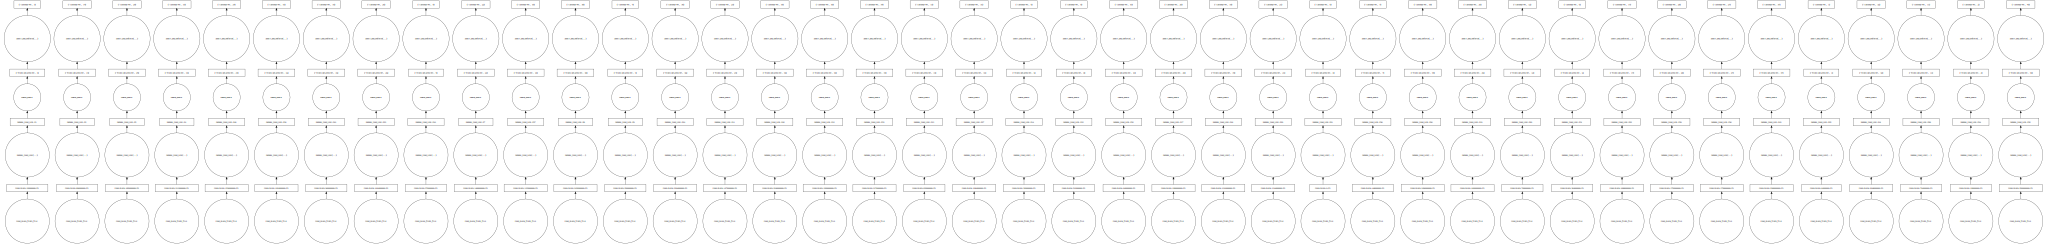

In [6]:
%%time

# Timing apply on the Haversine function
dask_df.map_partitions(lambda row: dask_haversine(40.671, -73.985, row['latitude'], row['longitude']), meta=('x', 'f8')).visualize(format='svg')